In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy import *
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df['Jeff'] = df['Jeff'].str.rstrip('%').astype('float')/ 100.0

In [5]:
df

,Project,PL Hours,FMC,Bumper Tools,IP Tools,MAP,ELP,HMIN,HCM,HDM,HMA,HGT,HRA,One Plant,Two Plants,Three Plants,Total Plants,Global,Jeff
0,15 CRV MMC-PO(R3NB 1085E),1531.20,0,9,6,0,1,0,1,1,0,1,0,0,0,1,3,1,0.00
1,15.5 ILX MMC-PO (R3NB 1073E),262.25,0,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0.93
2,16 Pilot FMC-PO (R3NB0077E),611.10,1,2,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.00
3,16 RDX MMC-PO (R3NB 1030E),347.10,0,3,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0.59
4,16.5M MDX MMC-PO (R3NB1037E),789.55,0,3,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.00
5,16.5M RIDGELINE FMC-PO (R3NB 1036E),584.00,1,3,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0.33
6,16M ACCORD MMC-PO-2D(R3NB 1032E)(2D 4D),489.75,0,4,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0.93
7,16 M CIVIC FMC-PO,1549.95,1,6,14,0,0,1,1,0,0,1,0,0,1,0,2,1,0.00
8,16M CIVIC FMC-PO-Si (R3NB 1008E - 5D),189.50,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0.00
9,17M CRV FMC,1402.00,1,8,14,0,1,0,1,0,0,1,0,0,1,0,2,1,0.98


In [6]:
max_column_num = df.shape[1]  

In [7]:
Data = df.drop(['HRA','One Plant','Two Plants','Three Plants'], axis =1)

In [8]:
max_column_num = max_column_num - 4 + 1  

In [9]:
Data.to_numpy()

array([['15 CRV MMC-PO(R3NB 1085E)', 1531.2, 0, 9, 6, 0, 1, 0, 1, 1, 0,
        1, 3, 1, 0.0],
       ['15.5 ILX MMC-PO (R3NB 1073E)', 262.25, 0, 2, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0.93],
       ['16 Pilot FMC-PO (R3NB0077E)', 611.1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0.0],
       ['16 RDX MMC-PO (R3NB 1030E)', 347.1, 0, 3, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0.59],
       ['16.5M MDX MMC-PO (R3NB1037E)', 789.55, 0, 3, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0.0],
       ['16.5M RIDGELINE FMC-PO (R3NB 1036E)', 584.0, 1, 3, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0.33],
       ['16M ACCORD MMC-PO-2D(R3NB 1032E)(2D 4D)', 489.75, 0, 4, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0.93],
       ['16 M CIVIC FMC-PO', 1549.95, 1, 6, 14, 0, 0, 1, 1, 0, 0, 1, 2,
        1, 0.0],
       ['16M CIVIC FMC-PO-Si (R3NB 1008E - 5D)', 189.5, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0.0],
       ['17M CRV FMC', 1402.0, 1, 8, 14, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0.98],
       ['17M ODYSSEY FMC-PO', 5

In [10]:
Y=Data.iloc[:,1]

In [11]:
X=Data.iloc[:,2:max_column_num]  

In [12]:
X = sm.add_constant(X, prepend = False) 

In [13]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

FMC             184.040092
Bumper Tools    138.471307
IP Tools         23.636692
MAP              52.355030
ELP             293.787511
HMIN            361.199298
HCM            -353.928057
HDM             -50.672599
HMA            -321.742310
HGT            -289.673947
Total Plants    -19.001128
Global          113.313328
Jeff           -551.083460
const           508.453485
dtype: float64

In [14]:
results.tvalues

FMC             1.484743
Bumper Tools    6.038516
IP Tools        1.319039
MAP             0.360901
ELP             2.188589
HMIN            2.504491
HCM            -2.690312
HDM            -0.352157
HMA            -1.472955
HGT            -1.008262
Total Plants   -0.127413
Global          0.527790
Jeff           -4.359495
const           1.566421
dtype: float64

In [15]:
Y

0     1531.20
1      262.25
2      611.10
3      347.10
4      789.55
5      584.00
6      489.75
7     1549.95
8      189.50
9     1402.00
10     560.50
11    1209.54
12    1439.45
13     818.75
14     477.00
15     560.50
16     956.00
17     283.00
18     348.50
19    1311.25
Name: PL Hours, dtype: float64

In [16]:
X

,FMC,Bumper Tools,IP Tools,MAP,ELP,HMIN,HCM,HDM,HMA,HGT,Total Plants,Global,Jeff,const
0,0,9,6,0,1,0,1,1,0,1,3,1,0.00,1.0
1,0,2,0,0,0,1,0,0,0,1,1,0,0.93,1.0
2,1,2,0,0,0,0,0,0,1,0,1,0,0.00,1.0
3,0,3,0,0,1,0,0,0,0,1,1,0,0.59,1.0
4,0,3,0,0,0,0,0,0,1,0,1,0,0.00,1.0
5,1,3,0,0,0,0,0,0,1,0,1,0,0.33,1.0
6,0,4,0,1,0,0,0,0,0,1,1,1,0.93,1.0
7,1,6,14,0,0,1,1,0,0,1,2,1,0.00,1.0
8,1,1,0,0,0,0,1,0,0,1,1,0,0.00,1.0
9,1,8,14,0,1,0,1,0,0,1,2,1,0.98,1.0


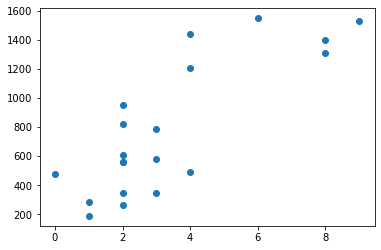

In [17]:
X1=Data.iloc[:,3]
plt.scatter(X1,Y)
plt.show()

# 2、

In [18]:
max_p = 1  # delete the max p value 
while float(max_p) > 0.05:
    model1=sm.OLS(pd.DataFrame(Y).astype(float),pd.DataFrame(X).astype(float))
    m1=model1.fit()
    model1_summary = m1.summary()
    

    model1_summary_ptable = model1_summary.tables[1].data
    head_list = model1_summary_ptable[0]
    model1_summary_ptable.pop(0)
    pdata_table_df = pd.DataFrame(data = model1_summary_ptable, columns = head_list)
    p_list = pdata_table_df['P>|t|'][0:pdata_table_df.shape[0]-1]
    max_p = max(p_list)
    max_p_index = pdata_table_df.loc[pdata_table_df['P>|t|']==max_p].index.to_list()
    max_p_name = pdata_table_df.iloc[max_p_index][''].loc[max_p_index[0]]
    
    if float(max_p) > 0.05:
        Data=Data.drop(max_p_name,axis=1)
        X=Data.iloc[:,2:max_column_num]
        X=sm.add_constant(X,prepend=False)
    else:
        break

In [20]:
print(m1.summary()) # all good 

                            OLS Regression Results                            
Dep. Variable:               PL Hours   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     25.82
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.34e-06
Time:                        13:01:51   Log-Likelihood:                -127.33
No. Observations:                  20   AIC:                             266.7
Df Residuals:                      14   BIC:                             272.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Bumper Tools   135.7747     18.371      7.391   

# 3、

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [22]:
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [23]:
model2.coef_         #

array([ 132.73522253,   41.84537481, -200.31792565, -184.30993428,
       -532.11422222,    0.        ])

In [24]:
model2.intercept_    #

455.5801069213302

In [25]:
model2.score(x_test,y_test)

0.8889403442158573

In [26]:
y_predict=model2.predict(x_test)
y_all_predict=model2.predict(X)

In [27]:
dic1 = {'test':    Y,
        'predict': y_all_predict, 
        'compare': list((Y))-np.array(y_all_predict)}  
dic= pd.DataFrame(dic1)

In [28]:
print(dic, '\n')

       test      predict     compare
0   1531.20  1700.951433 -169.751433
1    262.25   226.184325   36.065675
2    611.10   536.740618   74.359382
3    347.10   539.838383 -192.738383
4    789.55   669.475840  120.074160
5    584.00   493.878147   90.121853
6    489.75   491.654770   -1.904770
7   1549.95  1637.508764  -87.558764
8    189.50   387.997404 -198.497404
9   1402.00  1381.507271   20.492729
10   560.50   536.740618   23.759382
11  1209.54  1321.283996 -111.743996
12  1439.45  1070.211747  369.238253
13   818.75   721.050552   97.699448
14   477.00   404.040003   72.959997
15   560.50   721.050552 -160.550552
16   956.00   721.050552  234.949448
17   283.00   404.005395 -121.005395
18   348.50   536.740618 -188.240618
19  1311.25  1317.143962   -5.893962 



In [29]:
xx=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

Text(0.5, 0, 'Compare')

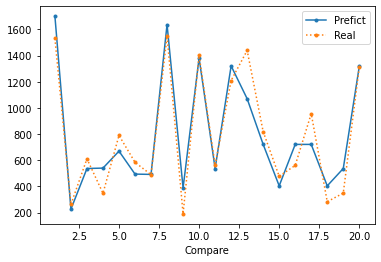

In [30]:
plt.plot(xx, y_all_predict, '.-', label=r"Prefict")
plt.plot(xx, Y, '.:', label=r"Real")
plt.legend()
plt.xlabel("Compare")